In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [42]:
# Find the most recent date in the data set.
#recent_date = (session.query(measurement.date).order_by(measurement.date.desc()).first())
#recent_date

last_date = session.query(func.max(measurement.date)).scalar()
last_date

'2017-08-23'

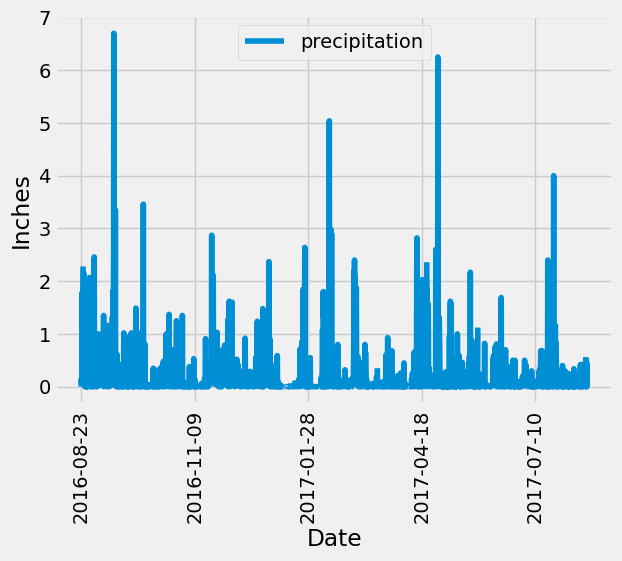

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - timedelta(days=365)
#one_year_later_date = dt.date(one_year_later.year, one_year_later.month, one_year_later.day)
#one_year_later_date

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).order_by(measurement.date.desc()).all()
# results

# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores_df = pd.DataFrame(results, columns = ['date', 'precipitation'])
scores_df.head()

# Sort the dataframe by date
scores_df.set_index(scores_df['date'])
scores_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot('date', 'precipitation')

plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["precipitation"], loc = 'upper center')
plt.xticks(rotation = 90)
plt.show()


In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
scores_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [57]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [58]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# most active station ID is USC00519281
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

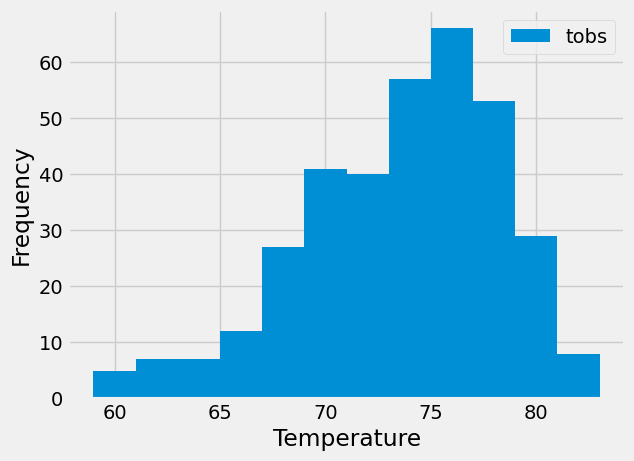

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date>=last_year)
results

temps_df = pd.DataFrame(results, columns = ['tobs'])
# temps_df.head()

temps_df.plot.hist(bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()


# Close Session

In [62]:
# Close Session
session.close()